In [1]:
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# Algorithms
from minisom import MiniSom
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, r2_score
import sqlite3
from datetime import datetime
import matplotlib.dates as mdates
import warnings

# Suppression warnings pour calcul np sur des NaN
warnings.filterwarnings(action='ignore', message='All-NaN slice encountered')

# Liste des fonctions utilisées

# Fonction de requetage auprès de la base de données sqlite
def f_requete_sql (requete) :
    try:
        connexion = sqlite3.connect('../data/liste_piezos.db')
        curseur = connexion.cursor()
        print("Connexion réussie à SQLite")
        curseur.execute(requete)
        connexion.commit()
        resultat = curseur.fetchall()
        curseur.close()
        connexion.close()
        print("Connexion SQLite est fermée")
        return resultat
    except sqlite3.Error as error:
        print("Erreur lors du mis à jour dans la table", error)

# Fonction d'affichage des valeurs manquantes
def f_plot_nan (dataframe):
    f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
    sns.heatmap(dataframe.T.isna(), cmap='Blues', cbar=False)
    ax.set_title('Missing Values', fontsize=16)
    # Masquage des noms de piezo 
    ax.yaxis.set_visible(False)
    # Formatage de la date pour l'affichage
    ax.xaxis.set_ticklabels([pd.to_datetime(value).strftime('%Y') for value in ax.xaxis.get_major_formatter().func.args[0].values()])
    plt.show()
        

# Fonction pour standardiser les données
def scaleColumns(df):
    for col in df.columns:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df[col])),columns=[col], index=df.index)
    return df


directory = './data/'
files = os.listdir(directory)
cluster_files = [file for file in files if file.endswith("clusters.csv")]
cluster_files

['ARA_clusters.csv',
 'BFC_clusters.csv',
 'BRE_clusters.csv',
 'CVL_clusters.csv',
 'FRANCE_clusters.csv',
 'GES_clusters.csv',
 'HDF_clusters.csv',
 'IDF_clusters.csv',
 'NAQ_clusters.csv',
 'NOR_clusters.csv',
 'OCC_clusters.csv',
 'PAC_clusters.csv',
 'PDL_clusters.csv']

C:\Users\daranlot\AppData\Local\Temp\ipykernel_14100\1532355079.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'B_x', 'C_x', 'A_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = pd.merge(data,df,left_index=True, right_index=True,how='outer')
C:\Users\daranlot\AppData\Local\Temp\ipykernel_14100\1532355079.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'B_x', 'C_x', 'E_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = pd.merge(data,df,left_index=True, right_index=True,how='outer')
C:\Users\daranlot\AppData\Local\Temp\ipykernel_14100\1532355079.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'D_x', 'A_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = pd.merge(data,df,left_index=True, right_index=True,how='outer')
C:\Users\daranlot\AppData\Local\Temp\ipykernel_14100\1532355079.py:6: FutureWarning: Pass

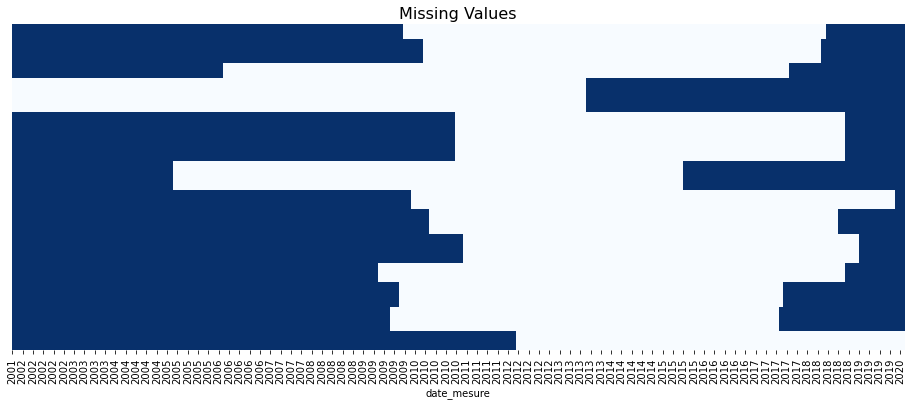

In [2]:
data = pd.read_csv(directory+f"{cluster_files[0]}", sep=",",  index_col=0, parse_dates=True)
# ‘epoch’: origin is 1970-01-01

for file in cluster_files[1:]:
    df = pd.read_csv(f"{directory+file}", sep=",",  index_col=0, parse_dates=True)
    data = pd.merge(data,df,left_index=True, right_index=True,how='outer')
    
f_plot_nan(data)

In [25]:
# Réajustement des dates de début et de fin
debut = []
fin = []
for column in data.columns:
    debut.append(data[f"{column}"].first_valid_index())
    fin.append(data[f"{column}"].last_valid_index()) 
# date_debut = plus grande date en partant du début où il n'y a plus de Nan. Inversement pour date_fin    
date_debut = max(debut)
date_fin = min(fin)
data = data.loc[date_debut:date_fin]
print(f"Il y a {data.shape[1]} chroniques pour le clustering.")

Il y a 80 chroniques pour le clustering.


<AxesSubplot:xlabel='date_mesure'>

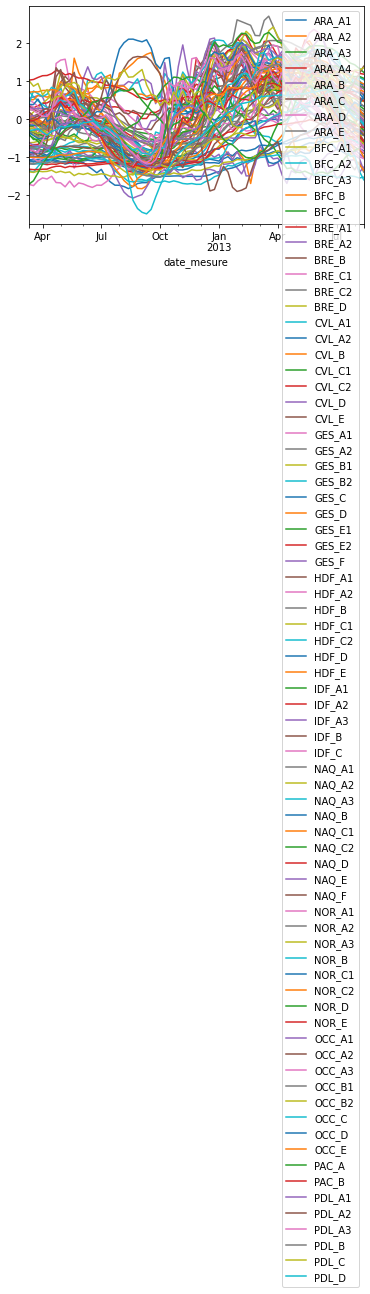

In [26]:
data.plot()

In [ ]:
# Sauvegarde du dataframe traité en format csv en vue du clustering
data_norm.to_csv(f"../Clustering/data/{region}.csv", sep = ";")
print("dataframe enregistré en csv.")

In [7]:
def requete_sql (requete) :
    try:
        connexion = sqlite3.connect('../data/liste_piezos.db')
        curseur = connexion.cursor()
        print("Connexion réussie à SQLite")
        curseur.execute(requete)
        connexion.commit()
        resultat = curseur.fetchall()
        curseur.close()
        connexion.close()
        print("Connexion SQLite est fermée")
        return resultat
    except sqlite3.Error as error:
        print("Erreur lors du mis à jour dans la table", error)

# Import des données
## Import des chroniques des clusters

In [8]:
directory = './data/'

files = os.listdir(directory)
cluster_files = [file for file in files if file.endswith("clusters.csv")]
cluster_files

['ARA_clusters.csv',
 'BFC_clusters.csv',
 'BRE_clusters.csv',
 'CVL_clusters.csv',
 'GES_clusters.csv',
 'HDF_clusters.csv',
 'IDF_clusters.csv',
 'NAQ_clusters.csv',
 'NOR_clusters.csv',
 'OCC_clusters.csv',
 'PAC_clusters.csv',
 'PDL_clusters.csv']

In [14]:
data = pd.read_csv(directory+f"{cluster_files[0]}", sep=",",  index_col=0, parse_dates=True)
data.head()

,ARA_A1,ARA_A2,ARA_A3,ARA_A4,ARA_B,ARA_C,ARA_D,ARA_E
date_mesure,,,,,,,,
2009-11-26,0.105476,-0.829939,1.282314,-0.633667,0.867528,-0.737658,-1.219912,-0.634469
2009-12-03,0.068126,-0.697105,1.226974,-0.259881,0.678000,-0.365970,-1.233864,-0.641296
2009-12-10,0.053514,-0.581557,1.262085,-0.298507,0.616818,-0.166646,-1.208240,-0.655181
2009-12-17,0.121243,-0.644803,1.174296,-0.248335,0.586700,-0.376361,-1.224439,-0.667523
2009-12-24,0.126711,-0.372150,1.135444,0.609600,0.374428,0.142490,-1.231191,-0.673685


In [12]:
directory = './data/'

# Lecture des données du premier piezo de la liste pour initialiser le dataframe
data = pd.read_csv(directory+f"{cluster_files[0]}", sep=";",  index_col=0, parse_dates=True)
#data.rename(columns={"piezo":f"{code_bss[0]}"}, inplace=True)

custom_date_parser = lambda x: datetime.strptime(x, "%Y-%m-%d")

for file in cluster_files[1:]:
    df = pd.read_csv(directory+file, sep=";",  index_col=0, parse_dates=True, date_parser=custom_date_parser)
    #df.rename(columns={"piezo":f"{file}"}, inplace=True)
    data = pd.merge(data,df,left_index=True, right_index=True,how='outer')

C:\Users\daranlot\AppData\Local\Temp\ipykernel_9796\930792604.py:10: FutureWarning: 
        Use pd.to_datetime instead.

  df = pd.read_csv(directory+file, sep=";",  index_col=0, parse_dates=True, date_parser=custom_date_parser)


ValueError: unconverted data remains: ,0.20604078657846775,-0.25170876785363266,-0.8684914268821353,-0.05792538340576994,-0.004769936562592114

In [ ]:
data

In [ ]:
data.columns

## Visualisation des valeurs manquantes

In [ ]:
# Fonction d'affichage des valeurs manquantes
def f_plot_nan (dataframe):
    f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
    sns.heatmap(dataframe.T.isna(), cmap='Blues', cbar=False)
    ax.set_title('Missing Values', fontsize=16)
    # Masquage des noms de piezo 
    ax.yaxis.set_visible(False)
    # Formatage de la date pour l'affichage
    ax.xaxis.set_ticklabels([pd.to_datetime(value).strftime('%Y') for value in ax.xaxis.get_major_formatter().func.args[0].values()])
    plt.show()

In [ ]:
f_plot_nan(data)

# Traitement des données

## Rééchantillonnage à la semaine

In [ ]:
data_week = pd.DataFrame(data.resample('7D').mean())

In [ ]:
f_plot_nan(data_week)

In [ ]:
data_week.shape

## Echelle de temps fixée après 2010 pour limiter les Nan

In [ ]:
data_week_from_ = data_week.loc['01-01-2010':]

In [ ]:
f_plot_nan(data_week_from_)

In [ ]:
data_week_from_.shape

## Suppression des valeurs abbérantes
Utilisation de la méthode IQR pour supprimer les valeurs abbérantes.
- Calcul des quartiles et de l'écart interquartile
- Suppression des valeurs < Q1 - 1.5*IQR
- Suppression des valeurs > Q3 + 1.5*IQR

In [ ]:
nbre_na = data_week_from_.isna().sum().sum()
print(f"Il y a à ce stade {nbre_na} valeurs nulles dans l'ensemble du dataframe.")

In [ ]:
data_wo_outliers = data_week_from_.copy()

In [ ]:
for piezo in data_wo_outliers.columns : 
    q1 = np.nanquantile(data_wo_outliers[f"{piezo}"], .25)
    q3 = np.nanquantile(data_wo_outliers[f"{piezo}"], .75)
    IQR = q3-q1
    data_wo_outliers.loc[data_wo_outliers[f"{piezo}"] < (q1-1.5*IQR), piezo] = np.NaN
    data_wo_outliers.loc[data_wo_outliers[f"{piezo}"] > (q3+1.5*IQR), piezo] = np.NaN
    data_wo_outliers[f"{piezo}"].plot()

In [ ]:
f_plot_nan(data_wo_outliers)

In [ ]:
nbre_na_2 = data_wo_outliers.isna().sum().sum()
print(f"Il y a à ce stade {nbre_na_2} valeurs nulles dans l'ensemble du dataframe.")

## Suppression des piezos avec plus de 10% de valeurs manquantes

In [ ]:
# Liste des piezos avec plus de 10% de valeurs manquantes
bss_to_drop = data.loc[:,data_wo_outliers.isna().sum()>0.10*data_wo_outliers.shape[0]].columns

In [ ]:
data_clean = data_wo_outliers.copy().drop(bss_to_drop, axis=1)

In [ ]:
f_plot_nan(data_clean)

In [ ]:
nbre_na_3 = data_clean.isna().sum().sum()
print(f"Il y a à ce stade {nbre_na_3} valeurs nulles dans l'ensemble du dataframe.")

In [ ]:
data_clean.shape

## Interpolation

In [ ]:
data_interpol = data_clean.copy().interpolate('linear')

In [ ]:
data_interpol.shape

In [ ]:
f_plot_nan(data_interpol)

## Réajustement des dates de début et de fin

In [ ]:
debut = []
for column in data_interpol.columns:
    debut.append(data_interpol[f"{column}"].first_valid_index())
date_debut = max(debut)

In [ ]:
fin = []
for column in data_interpol.columns:
    fin.append(data_interpol[f"{column}"].last_valid_index())
date_fin = min(fin)
date_fin

In [ ]:
data_interpol = data_interpol.loc[date_debut:date_fin]

In [ ]:
print(f"Nombre total de Nan : {data_interpol.isna().sum().sum()}")

In [ ]:
data_interpol.shape

In [ ]:
data_interpol.shape[1]

## Affichage des chroniques après nettoyage

In [ ]:
if data_interpol.shape[1]%4 == 0:
    nbre_lignes = data_interpol.shape[1]//4
else : 
    nbre_lignes = data_interpol.shape[1]//4 + 1

fig, axs = plt.subplots(nbre_lignes,4,figsize=(25,200))
#fig.suptitle('Series')
for i in range(nbre_lignes):
    for j in range(4):
        if i*4+j+1>data_interpol.shape[1]: # pass the others that we can't fill
            continue
        axs[i, j].plot(data_interpol.iloc[:,i*4+j])
        axs[i, j].set_title(data_interpol.columns[i*4+j])
plt.show()

## Normalisation StandardScaler

In [ ]:
def scaleColumns(df):
    for col in df.columns:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df[col])),columns=[col], index=df.index)
    return df

In [ ]:
scaler = StandardScaler()
data_norm = scaleColumns(data_interpol.copy())

In [ ]:
data_norm.head()

In [ ]:
data_norm.columns

## Sauvegarde du dataframe en csv

In [ ]:
data_norm.to_csv(f"./data/FRANCE_CLUSTERS.csv", sep = ";")